# **Predict the cancer mortality rate per capita (100000) using several demographic variables**




# **Import essential libraries** 

In [1]:
# import libraries
import pandas as pd # for data manupulation or analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import pandas_profiling as pf

In [2]:
# Disable Warnings
import warnings
warnings.filterwarnings('ignore')

# **Data Load**

**Load breast cancer dataset & explore**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
file = '/content/drive/MyDrive/cancer_reg.csv'        

In [5]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [6]:
#Load breast cancer dataset
#oscar_demographic
cancer_dataset = pd.read_csv(file,encoding='ISO-8859-1')
cancer_dataset.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# **Data Manupulation**

In [7]:
#loading cancer dataset
cancer_dataset

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,41.1,48.8,"Ellsworth County, Kansas",2.08,51.0,20.9,27.9,NaN,8.4,32.2,15.2,51.7,4.3,78.3,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,29.3,31.4,"Finney County, Kansas",2.90,52.6,26.7,33.9,35.6,3.8,23.1,12.4,70.1,4.6,64.5,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,30.5,31.2,"Ford County, Kansas",3.04,54.8,19.7,44.5,33.3,2.5,23.0,12.8,64.8,6.4,62.0,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,36.9,40.5,"Franklin County, Kansas",2.56,58.8,10.9,37.2,NaN,4.1,36.1,14.4,NaN,6.9,75.9,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [8]:
# Checking dimension of data
cancer_dataset.shape

(3047, 34)

In [9]:
#checking type of cancer dataset
type(cancer_dataset)

pandas.core.frame.DataFrame

In [10]:
# keys in dataset
cancer_dataset.keys()

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [11]:
# Head of cancer DataFrame
cancer_dataset.head(6) 

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
5,428.0,152,176.0,505.4,52313,61023,15.6,180.259902,"(51046.4, 54545.6]",45.4,43.5,48.0,"Mason County, Washington",2.58,50.4,29.9,35.1,NaN,4.5,30.4,11.9,44.1,12.9,60.0,38.8,32.6,43.2,20.2,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476


In [12]:
# Tail of cancer DataFrame
cancer_dataset.tail(6) 

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
3041,1962.667684,48,146.4,453.549422,49508,29029,13.0,723.414516,"(48021.6, 51046.4]",32.2,31.0,33.8,"Ellis County, Kansas",2.35,45.1,2.9,17.7,NaN,9.8,27.7,21.9,68.6,4.5,80.0,64.5,52.9,24.3,9.5,94.291726,1.145104,1.386542,1.014038,43.276779,3.977583
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,41.1,48.8,"Ellsworth County, Kansas",2.08,51.0,20.9,27.9,NaN,8.4,32.2,15.2,51.7,4.3,78.3,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,29.3,31.4,"Finney County, Kansas",2.90,52.6,26.7,33.9,35.6,3.8,23.1,12.4,70.1,4.6,64.5,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,30.5,31.2,"Ford County, Kansas",3.04,54.8,19.7,44.5,33.3,2.5,23.0,12.8,64.8,6.4,62.0,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,36.9,40.5,"Franklin County, Kansas",2.56,58.8,10.9,37.2,NaN,4.1,36.1,14.4,NaN,6.9,75.9,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938
3046,1962.667684,48,213.6,453.549422,41193,37030,13.9,0.000000,"(40362.7, 42724.4]",26.2,25.5,27.0,"Geary County, Kansas",2.83,59.5,8.0,43.3,43.9,4.8,29.8,13.7,48.8,9.2,76.1,60.3,22.9,25.1,12.6,70.098132,16.590100,3.177753,1.356457,56.040242,8.981723


In [13]:
# Information of cancer Dataframe
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [14]:
# Numerical distribution of data
cancer_dataset.describe() 

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,42.145323,2.479662,51.773679,18.224450,35.002068,40.977034,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,5.292849,0.429174,6.896928,8.093064,9.069722,11.115805,4.529059,7.034924,5.394756,8.315064,3.452371,10.647057,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,39.100000,2.370000,47.750000,12.800000,29.200000,34.000000,3.100000,30.400000,9.400000,48.600000,5.500000,57.200000,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,42.400000,2.500000,52.400000,17.100000,34.700000,40.400000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,45.300000,2.630000,56.400000,22.700000,40.700000,46.400000,8.200000,39.650000,16.100000,60.300000,9.700000,72.100000,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,3.970000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [15]:
# Pandas Profiling for a better summary of all attributes
#pf.ProfileReport(cancer_dataset)

In [16]:
# checking for missing values
cancer_dataset.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [17]:
# checking NULL values
cancer_dataset[cancer_dataset.isnull().any(axis=1)]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
5,428.000000,152,176.0,505.400000,52313,61023,15.6,180.259902,"(51046.4, 54545.6]",45.4,43.5,48.0,"Mason County, Washington",2.58,50.4,29.9,35.1,NaN,4.5,30.4,11.9,44.1,12.9,60.0,38.8,32.6,43.2,20.2,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476
6,250.000000,97,175.9,461.800000,37782,41516,23.2,0.000000,"(37413.8, 40362.7]",42.6,42.2,43.5,"Okanogan County, Washington",2.42,54.1,26.1,41.4,NaN,5.8,29.8,11.9,51.8,8.9,49.5,35.0,28.3,46.4,28.7,75.106455,0.616955,0.866157,8.356721,51.013900,4.204317
8,88.000000,36,190.5,459.400000,42579,13088,22.3,0.000000,"(40362.7, 42724.4]",49.3,48.4,49.8,"Pend Oreille County, Washington",2.38,55.9,34.7,39.4,NaN,1.4,32.2,12.0,39.5,10.3,55.5,37.8,29.9,48.1,26.6,91.787477,0.185071,0.208205,0.616903,53.446998,5.587583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,1962.667684,9,208.3,453.549422,49256,2968,10.5,673.854447,"(48021.6, 51046.4]",45.2,45.2,45.3,"Edwards County, Kansas",2.27,60.9,16.3,29.2,NaN,14.4,30.7,15.0,61.3,2.0,68.1,51.9,39.4,30.6,15.5,93.781344,0.902708,0.300903,3.443664,55.965463,4.210526
3040,1962.667684,12,215.9,453.549422,36471,2605,17.4,0.000000,"(34218.1, 37413.8]",50.4,49.1,52.2,"Elk County, Kansas",2.10,60.3,6.5,59.7,NaN,4.8,35.3,11.8,50.7,5.3,66.0,42.5,36.2,45.5,20.3,94.371972,0.782706,0.409989,0.447261,52.149682,3.050109
3041,1962.667684,48,146.4,453.549422,49508,29029,13.0,723.414516,"(48021.6, 51046.4]",32.2,31.0,33.8,"Ellis County, Kansas",2.35,45.1,2.9,17.7,NaN,9.8,27.7,21.9,68.6,4.5,80.0,64.5,52.9,24.3,9.5,94.291726,1.145104,1.386542,1.014038,43.276779,3.977583
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,41.1,48.8,"Ellsworth County, Kansas",2.08,51.0,20.9,27.9,NaN,8.4,32.2,15.2,51.7,4.3,78.3,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512


In [18]:
cancer_dataset.dropna(inplace=True)

In [19]:
# checking for missing values
cancer_dataset.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [20]:
# Information of cancer Dataframe
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 1 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              591 non-null    float64
 1   avgDeathsPerYear         591 non-null    int64  
 2   TARGET_deathRate         591 non-null    float64
 3   incidenceRate            591 non-null    float64
 4   medIncome                591 non-null    int64  
 5   popEst2015               591 non-null    int64  
 6   povertyPercent           591 non-null    float64
 7   studyPerCap              591 non-null    float64
 8   binnedInc                591 non-null    object 
 9   MedianAge                591 non-null    float64
 10  MedianAgeMale            591 non-null    float64
 11  MedianAgeFemale          591 non-null    float64
 12  Geography                591 non-null    object 
 13  AvgHouseholdSize         591 non-null    float64
 14  PercentMarried           

In [21]:
# Numerical distribution of data
cancer_dataset.describe() 

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,682.316495,199.411168,179.090863,452.657990,47032.851100,1.145526e+05,16.723181,122.729567,45.985787,39.573266,42.059391,2.471901,51.890186,18.020305,35.174112,40.782910,6.022166,35.272420,13.154146,54.468528,7.819459,64.600846,48.749069,41.534687,36.193063,19.203215,84.224532,8.727607,1.183705,1.921294,51.318223,5.739657
std,1977.289390,708.330454,27.273580,54.381212,11405.103542,5.043527e+05,6.219356,357.586595,47.697553,5.118305,5.060084,0.450244,6.466839,7.853676,9.343338,11.033778,4.201368,6.860111,5.230278,7.715408,3.311420,10.454961,9.920562,9.544078,7.571871,5.960506,15.450720,13.582028,1.969232,3.391412,6.240708,1.899942
min,6.000000,3.000000,94.400000,234.000000,23047.000000,8.290000e+02,4.800000,0.000000,23.200000,23.700000,22.300000,0.022100,26.200000,0.500000,7.100000,7.100000,0.000000,12.700000,3.900000,19.500000,0.800000,31.500000,23.700000,16.300000,14.800000,2.600000,11.008762,0.000000,0.000000,0.000000,24.024634,0.413223
25%,87.000000,30.000000,161.350000,425.250000,39305.000000,1.232850e+04,12.000000,0.000000,38.200000,36.600000,39.300000,2.370000,48.200000,12.750000,29.300000,34.000000,2.850000,31.200000,9.250000,49.300000,5.700000,57.650000,41.900000,34.750000,30.950000,14.950000,78.083708,0.681788,0.267913,0.284278,48.105663,4.606546
50%,183.000000,64.000000,177.900000,453.549422,45235.000000,2.775500e+04,15.600000,0.000000,40.900000,39.500000,42.300000,2.500000,52.700000,17.000000,34.800000,40.300000,5.500000,35.600000,12.200000,55.000000,7.400000,65.800000,49.000000,41.600000,36.500000,18.700000,90.238859,2.450805,0.569827,0.755216,51.673640,5.497771
75%,542.000000,131.000000,195.400000,481.550000,52686.500000,6.621700e+04,19.900000,60.953380,43.600000,42.250000,44.900000,2.650000,56.500000,22.350000,41.200000,46.150000,8.250000,39.500000,15.800000,60.300000,9.500000,72.450000,55.900000,48.550000,40.700000,22.900000,95.266834,11.395684,1.197193,2.151791,55.311860,6.706986
max,38150.000000,14010.000000,293.900000,1014.200000,97279.000000,1.017029e+07,45.100000,3657.320182,508.800000,58.500000,58.000000,3.780000,65.900000,48.900000,72.500000,79.000000,28.500000,54.800000,35.500000,73.200000,27.000000,87.500000,76.600000,68.800000,62.200000,41.400000,100.000000,84.866024,23.238107,37.610994,71.703057,17.877095


In [22]:
# counting value of Geography
cancer_dataset["Geography"].value_counts()

Sussex County, Delaware             1
Warren County, Indiana              1
Esmeralda County, Nevada            1
Arkansas County, Arkansas           1
East Feliciana Parish, Louisiana    1
                                   ..
Carroll County, New Hampshire       1
Sevier County, Arkansas             1
Marion County, Oregon               1
Elkhart County, Indiana             1
Hancock County, Kentucky            1
Name: Geography, Length: 591, dtype: int64

In [23]:
# Head of geography in cancer DataFrame
cancer_dataset.Geography.head()

1     Kittitas County, Washington
3        Lewis County, Washington
4      Lincoln County, Washington
7      Pacific County, Washington
14     Spokane County, Washington
Name: Geography, dtype: object

In [24]:
features = ['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']

In [25]:
features

['avgAnnCount',
 'avgDeathsPerYear',
 'TARGET_deathRate',
 'incidenceRate',
 'medIncome',
 'popEst2015',
 'povertyPercent',
 'studyPerCap',
 'binnedInc',
 'MedianAge',
 'MedianAgeMale',
 'MedianAgeFemale',
 'Geography',
 'AvgHouseholdSize',
 'PercentMarried',
 'PctNoHS18_24',
 'PctHS18_24',
 'PctSomeCol18_24',
 'PctBachDeg18_24',
 'PctHS25_Over',
 'PctBachDeg25_Over',
 'PctEmployed16_Over',
 'PctUnemployed16_Over',
 'PctPrivateCoverage',
 'PctPrivateCoverageAlone',
 'PctEmpPrivCoverage',
 'PctPublicCoverage',
 'PctPublicCoverageAlone',
 'PctWhite',
 'PctBlack',
 'PctAsian',
 'PctOtherRace',
 'PctMarriedHouseholds',
 'BirthRate']

# Data Visualization

**Univariate Analysis**

Boxplots to check for outliers for the target variable

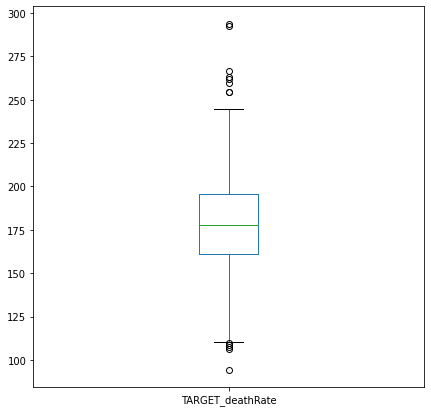

In [26]:
cancer_dataset['TARGET_deathRate'].plot(subplots = True, kind = 'box', layout = (1,1),figsize = [7,7])
plt.show()

There are no outliers in the target variables

Lets check the distributon of the target variable, target deathrate

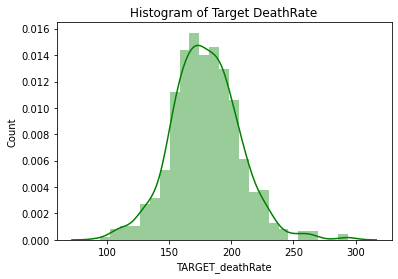

In [27]:
# Inspecting the distribution of the target column
sns.distplot(cancer_dataset['TARGET_deathRate'],color="Green")
plt.xlabel('TARGET_deathRate')
plt.ylabel('Count')
plt.title('Histogram of Target DeathRate')
plt.show()

Since the target variable is normally distributed, we can directly apply linear regression.

**Bivariate Analysis**

Multivariate plots allow us to see relationships between two and more different variables, all in one figure.

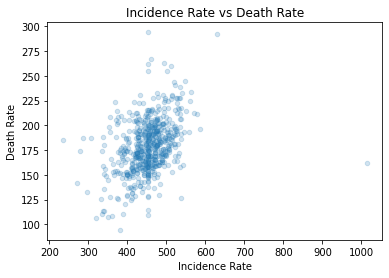

In [28]:
# Scatter Plot

cancer_dataset.plot(kind='scatter', x='incidenceRate', y='TARGET_deathRate', alpha=0.2)             
plt.xlabel('Incidence Rate')
plt.ylabel('Death Rate')
plt.title('Incidence Rate vs Death Rate')
plt.show()

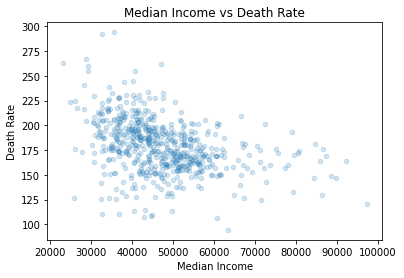

In [29]:
cancer_dataset.plot(kind='scatter', x='medIncome', y='TARGET_deathRate', alpha=0.2)
plt.xlabel('Median Income')
plt.ylabel('Death Rate')
plt.title('Median Income vs Death Rate')
plt.show()

There is a slight negative correlation between cancer death rate and median income.

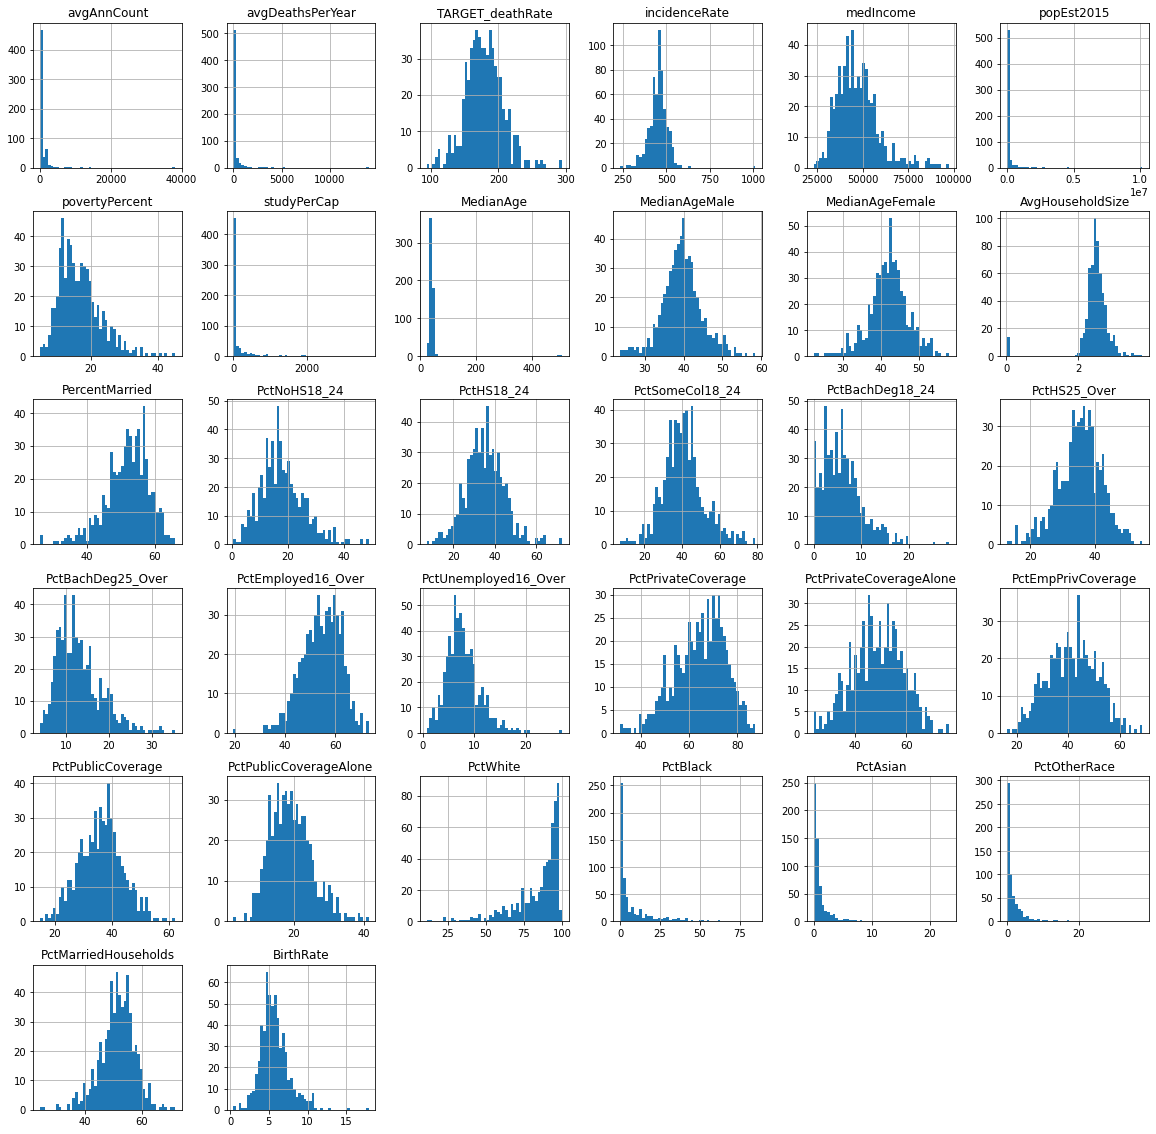

In [30]:
# for plotting histogram
%matplotlib inline
import matplotlib.pyplot as plt
cancer_dataset.hist(bins=50,figsize=(20,20))
plt.show()

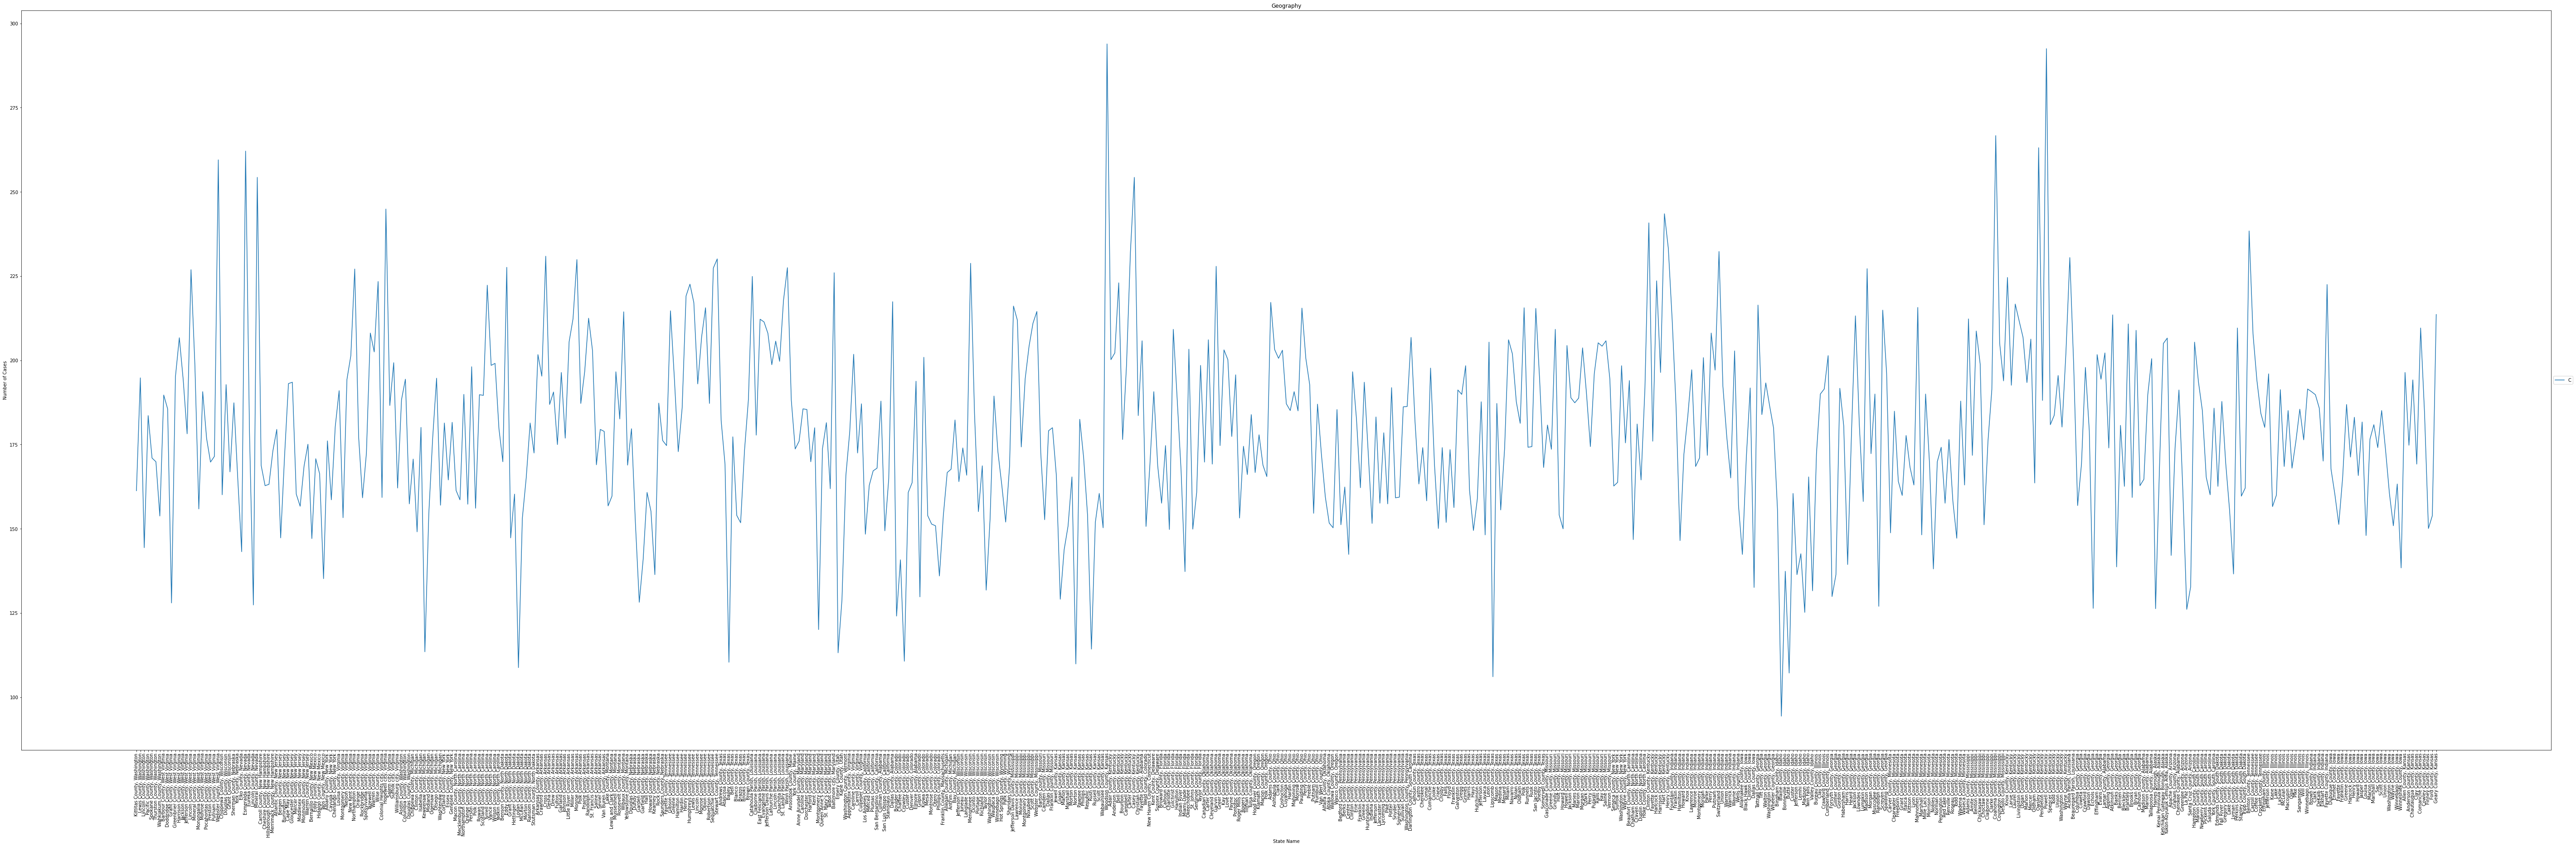

In [31]:
plt.figure(figsize=(100,30))
plt.plot(cancer_dataset["Geography"],cancer_dataset["TARGET_deathRate"])
plt.title("Geography")
plt.xticks(rotation=90)
plt.xlabel("State Name")
plt.ylabel("Number of Cases")
plt.legend("Cases",loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [32]:
# Plotting Pair Plot 
#sns.pairplot(cancer_dataset)
#plt.show()

# Heatmap

In [33]:
#There were a lot of columns that seemed insignificant in determining the deathrate and so we dropped those columns and considered the following only for our model.
cancer_dataset = cancer_dataset[['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'MedianAgeMale', 'MedianAgeFemale',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over','TARGET_deathRate']]

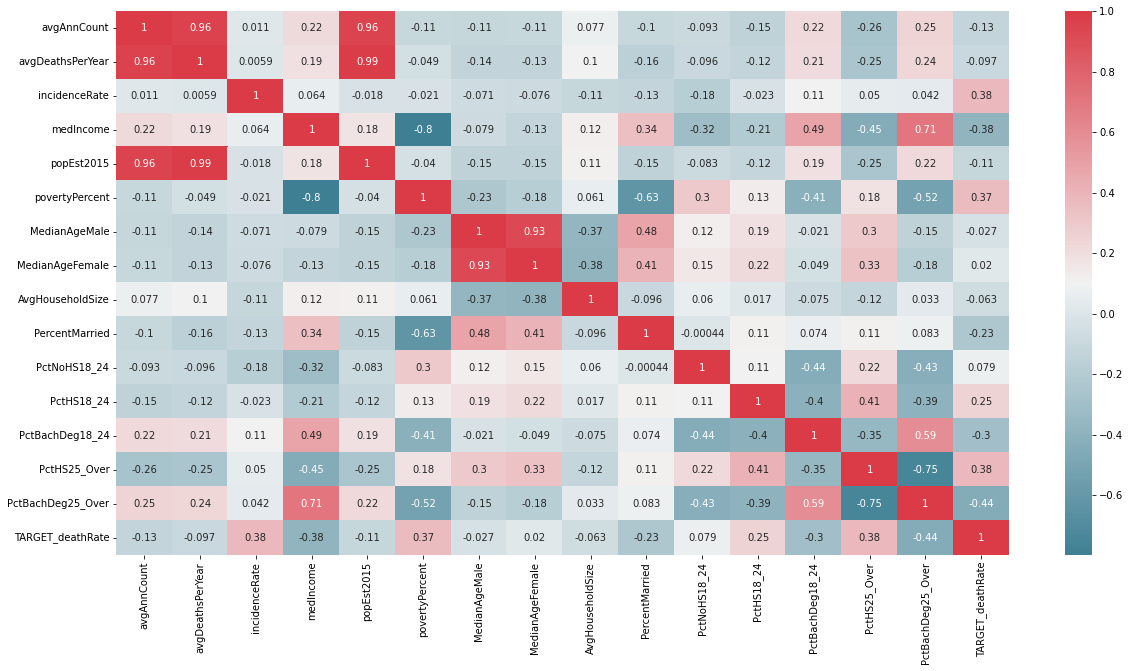

In [34]:
# heatmap of DataFrame
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(20,10))
sns.heatmap(cancer_dataset.corr(),cmap=cmap,annot=True)

##  Heatmap of a correlation matrix 

In [35]:
cancer_dataset.corr()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,TARGET_deathRate
avgAnnCount,1.000000,0.963882,0.010871,0.219067,0.957520,-0.105566,-0.110806,-0.107927,0.077267,-0.103546,-0.092584,-0.145028,0.224268,-0.263704,0.245992,-0.128587
avgDeathsPerYear,0.963882,1.000000,0.005936,0.189414,0.988023,-0.048667,-0.136011,-0.134683,0.102863,-0.164573,-0.096243,-0.122790,0.209481,-0.254167,0.235851,-0.096510
incidenceRate,0.010871,0.005936,1.000000,0.064140,-0.018021,-0.021349,-0.070816,-0.075830,-0.114925,-0.128565,-0.181979,-0.023155,0.108046,0.050472,0.042241,0.376033
medIncome,0.219067,0.189414,0.064140,1.000000,0.177701,-0.796091,-0.079002,-0.128884,0.117188,0.342108,-0.316687,-0.212364,0.487486,-0.449718,0.708231,-0.377156
popEst2015,0.957520,0.988023,-0.018021,0.177701,1.000000,-0.039724,-0.145278,-0.148584,0.112381,-0.145022,-0.083482,-0.117614,0.186542,-0.254249,0.223135,-0.109513
povertyPercent,-0.105566,-0.048667,-0.021349,-0.796091,-0.039724,1.000000,-0.233281,-0.181874,0.061160,-0.627303,0.302635,0.133819,-0.411651,0.183586,-0.516318,0.366102
MedianAgeMale,-0.110806,-0.136011,-0.070816,-0.079002,-0.145278,-0.233281,1.000000,0.928813,-0.365616,0.484189,0.121405,0.186905,-0.021145,0.303251,-0.145582,-0.026774
MedianAgeFemale,-0.107927,-0.134683,-0.075830,-0.128884,-0.148584,-0.181874,0.928813,1.000000,-0.380336,0.408933,0.154054,0.220647,-0.048961,0.333951,-0.183307,0.019737
AvgHouseholdSize,0.077267,0.102863,-0.114925,0.117188,0.112381,0.061160,-0.365616,-0.380336,1.000000,-0.095840,0.059894,0.017121,-0.074732,-0.119625,0.033026,-0.062568
PercentMarried,-0.103546,-0.164573,-0.128565,0.342108,-0.145022,-0.627303,0.484189,0.408933,-0.095840,1.000000,-0.000437,0.111180,0.073561,0.110392,0.082929,-0.229908


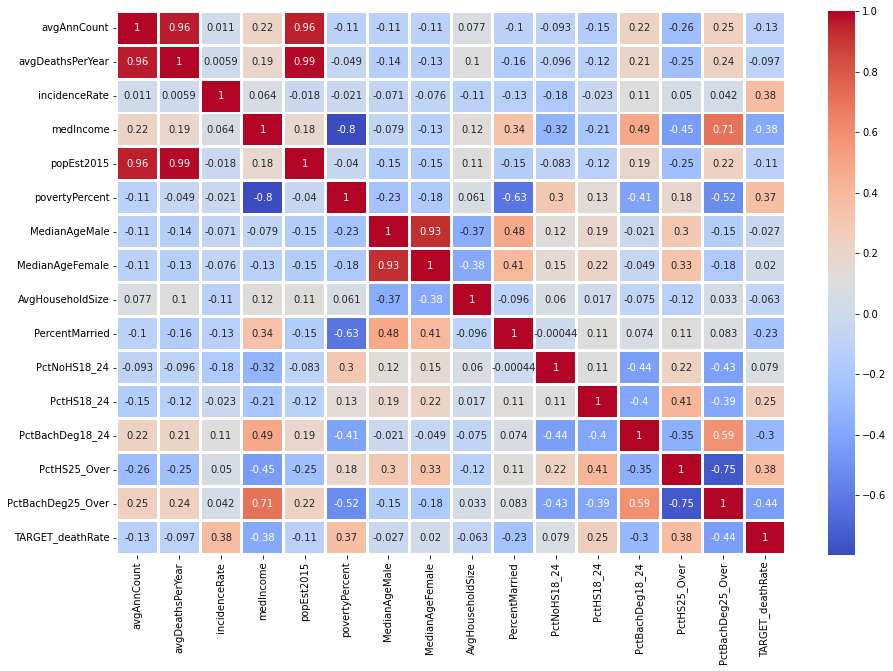

In [36]:
# Heatmap of Correlation matrix of breast cancer DataFrame
plt.figure(figsize=(15,10))
sns.heatmap(cancer_dataset.corr(), annot = True, cmap ='coolwarm', linewidths=2) # *** img 9 ***

# **Machine Learning Model Building**

# Split DatFrame in Train and Test

In [37]:
X=cancer_dataset.drop(['TARGET_deathRate'],axis=1)
y=cancer_dataset['TARGET_deathRate']

In [38]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.21, random_state= 0)

In [39]:
X_train

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over
2245,49.0,20,456.2,55925,8269,9.9,43.5,44.5,2.500,60.2,23.1,37.6,6.1,43.8,12.4
2183,108.0,51,396.8,54086,22872,11.1,39.8,42.7,2.570,61.6,24.7,27.4,7.3,42.6,12.9
364,1490.0,494,463.9,62861,358880,14.3,32.3,34.6,2.430,44.3,5.6,15.4,18.5,15.7,25.4
2613,66.0,27,463.0,39983,12063,19.7,39.1,42.5,2.560,52.6,14.8,29.2,2.6,41.6,6.8
1736,766.0,280,521.8,45211,116048,16.0,39.2,43.1,2.420,49.0,11.9,35.3,8.1,41.1,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,173.0,81,496.9,40774,27755,19.2,37.8,40.9,2.570,53.0,22.8,43.9,2.1,43.5,10.1
33,58.0,22,356.3,41039,11766,17.0,45.5,45.7,0.028,50.5,16.3,41.5,8.4,50.2,7.0
1954,161.0,77,464.5,43087,27413,18.6,42.6,44.5,2.840,55.5,34.6,45.5,0.0,45.0,8.1
1023,1459.0,520,443.7,61775,281401,14.5,37.1,41.5,2.510,48.2,6.3,20.1,7.2,19.7,20.8


In [40]:
X_test

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over
1208,75.000000,35,464.500000,28271,11665,29.8,42.1,44.6,2.35,41.6,24.4,41.4,2.3,39.1,9.7
43,139.000000,60,513.200000,34295,21415,24.4,41.4,42.8,2.69,50.6,16.9,50.7,5.2,43.4,5.7
420,540.000000,183,436.700000,60304,141354,14.1,32.7,33.9,2.47,45.2,5.8,23.9,15.0,15.6,25.4
2299,415.000000,169,472.900000,52082,88399,15.6,37.0,39.3,2.88,57.1,14.7,42.0,3.7,35.6,12.5
668,38.000000,14,450.800000,51040,6409,11.5,40.7,45.6,2.47,58.8,11.9,28.4,6.9,41.6,14.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,77.000000,34,430.100000,37853,14601,19.0,39.1,40.4,2.64,49.9,16.4,49.3,5.9,40.4,9.0
1427,8954.000000,3397,438.300000,51485,1896425,14.5,38.6,41.1,2.73,43.1,17.1,29.4,8.7,27.6,19.8
2327,13.000000,4,351.100000,42907,2501,14.8,40.9,40.9,2.59,56.6,46.3,13.8,0.0,36.5,11.3
2634,71.000000,28,468.900000,43111,12388,19.9,42.6,44.5,2.72,48.8,25.8,21.6,7.5,35.6,8.4


In [41]:
y_train

2245    177.2
2183    185.8
364     157.0
2613    180.2
1736    178.5
        ...  
1508    227.9
33      128.0
1954    215.4
1023    149.4
2936    189.8
Name: TARGET_deathRate, Length: 466, dtype: float64

In [42]:
y_test

1208    216.1
43      226.9
420     157.3
2299    193.3
668     155.2
        ...  
2847    184.3
1427    157.6
2327    107.2
2634    197.9
3030    169.2
Name: TARGET_deathRate, Length: 125, dtype: float64

In [43]:
# Checking the dimensions of test and train
X_train.shape

(466, 15)

In [44]:
X_test.shape

(125, 15)

In [45]:
y_train.shape

(466,)

In [46]:
y_test.shape

(125,)

# Feature scaling 

In [47]:
#First, we need to import the required packages.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [48]:
#Feature Scaling
#Converting different units and magnitude data in one unit.
sc=StandardScaler()
X_sc=sc.fit_transform(X_train)
Xt_sc=sc.transform(X_test)

**We have clean data to build the Ml model. But which Machine learning algorithm is best for the data we have to find. The output is a categorical format so we will use supervised learning machine learning algorithms.
To build the best model, we have to train and test the dataset with multiple Machine Learning algorithms then we can find the best ML model.**

# **Two Models with Bagging**

#Linear Regression

In [49]:
#Linear Regression
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr_clf = LinearRegression()
bag_clf = BaggingRegressor(lr_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

# Train with Standard scaled Data
bag_clf.fit(X_sc, y_train)
y_pred = bag_clf.predict(Xt_sc)
from  sklearn.metrics import r2_score
print('R2 score" {:.2f}'.format(r2_score(y_test, y_pred)))
bag_clf.fit(X_sc, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_sc, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(Xt_sc, y_test)))

R2 score" 0.32
Train score: 0.41
Test score: 0.32


In [50]:
ridge_clf = Ridge(alpha=0.1)
bag_clf = BaggingRegressor(ridge_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

# Train with Standard scaled Data
bag_clf.fit(X_sc, y_train)
y_pred = bag_clf.predict(Xt_sc)
from  sklearn.metrics import r2_score
print('R2 score" {:.2f}'.format(r2_score(y_test, y_pred)))
bag_clf.fit(X_sc, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_sc, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(Xt_sc, y_test)))

R2 score" 0.33
Train score: 0.41
Test score: 0.33


**Two Models with Pasting**

In [51]:
lr_clf = LinearRegression()
bag_clf = BaggingRegressor(lr_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

# Train with Standard scaled Data
bag_clf.fit(X_sc, y_train)
y_pred = bag_clf.predict(Xt_sc)
from  sklearn.metrics import r2_score
print('R2 score" {:.2f}'.format(r2_score(y_test, y_pred)))
bag_clf.fit(X_sc, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_sc, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(Xt_sc, y_test)))

R2 score" 0.34
Train score: 0.41
Test score: 0.34


In [52]:
ridge_clf = Ridge(alpha=0.1)
bag_clf = BaggingRegressor(ridge_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

# Train with Standard scaled Data
bag_clf.fit(X_sc, y_train)
y_pred = bag_clf.predict(Xt_sc)
from  sklearn.metrics import r2_score
print('R2 score" {:.2f}'.format(r2_score(y_test, y_pred)))
bag_clf.fit(X_sc, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_sc, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(Xt_sc, y_test)))

R2 score" 0.34
Train score: 0.41
Test score: 0.34


**Two models with Adaboost Regressor**

In [53]:
#AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
ada_clf = AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_sc, y_train)
print('Train score: {:.2f}'.format(ada_clf.score(X_sc, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(Xt_sc, y_test)))

Train score: 0.41
Test score: 0.33


In [54]:
from sklearn.ensemble import AdaBoostRegressor
ada_clf = AdaBoostRegressor(base_estimator=Ridge(alpha=0.1), n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_sc, y_train)
print('Train score: {:.2f}'.format(ada_clf.score(X_sc, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(Xt_sc, y_test)))

Train score: 0.41
Test score: 0.32


**One model with Gradient Boosting**

In [55]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(random_state=0, learning_rate=0.1)
gbrt.fit(X_sc, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_sc, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(Xt_sc, y_test)))

Accuracy on training set: 0.885
Accuracy on test set: 0.424


**Dimensionality Reduction using PCA**

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca=PCA(n_components=15)
X_reduced=pca.fit_transform(X_sc)
Xt_reduced=pca.transform(Xt_sc)

**Linear Regression**

In [58]:
lreg=LinearRegression()

In [59]:
lreg.fit(X_reduced,y_train)
print(lreg.score(X_reduced,y_train))
print(lreg.score(Xt_reduced,y_test))

0.420823070109433
0.33184753683100365


In [60]:
#finding Cross-validation scores, Average Train score and Average Test score using Linear Regression 
from sklearn.model_selection import cross_val_score
print('Cross-validation scores:',cross_val_score(lreg,X_sc,y_train) )
print('Cross-validation scores:',cross_val_score(lreg,Xt_sc,y_test) )
print('Average Train score:',cross_val_score(lreg,X_sc,y_train).mean())
print('Average Test score:',cross_val_score(lreg,Xt_sc,y_test).mean())

Cross-validation scores: [0.50455551 0.44759835 0.30563758 0.13650916 0.38040202]
Cross-validation scores: [ 0.34467284  0.27161174 -3.71075773 -0.1695334   0.49885498]
Average Train score: 0.35494052456248765
Average Test score: -0.5530303128279161


Text(0.5, 0, 'RM')

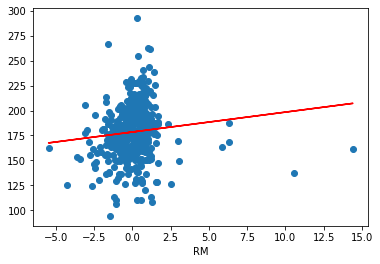

In [61]:
import matplotlib.pyplot as plt

X_train_rm = X_reduced[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

**Lasso**

In [62]:
#Lasso
X_range = [0.00001, 0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in X_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_reduced,y_train)
    train_score_list.append(lasso.score(X_reduced,y_train))
    test_score_list.append(lasso.score(Xt_reduced, y_test))

In [63]:
print(train_score_list)
print(test_score_list)

[0.42082307009686526, 0.42082294443132306, 0.42081050229843997, 0.41959909793966843, 0.3885011325267954, 0.13123816997457205, 0.0]
[0.33184919700786064, 0.3320133620612795, 0.3334882931836447, 0.3471275918102281, 0.37262941023873497, 0.10901328327496418, -0.010442332797331977]


In [64]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}]

print("# Tuning hyper-parameters")
print()

model_lasso = GridSearchCV(Lasso(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_lasso.fit(X_reduced, y_train)


print('Lasso: Best Parameters',model_lasso.best_params_)


y_pred_lasso = model_lasso.predict(Xt_reduced)
print(model_lasso.score(Xt_reduced,y_test))

# Tuning hyper-parameters

Lasso: Best Parameters {'alpha': 0.1}
0.3471275918102281


In [65]:
#finding Cross-validation scores, Average Train score and Average Test score using Lasso 
from sklearn.model_selection import cross_val_score
lasso = Lasso(alpha=0.0001)
lasso.fit(X_reduced,y_train)
print('Cross-validation scores:',cross_val_score(lasso,X_reduced,y_train) )
print('Cross-validation scores:',cross_val_score(lasso,Xt_reduced,y_test) )
print('Average Train score:',cross_val_score(lasso,X_reduced,y_train).mean())
print('Average Test score:',cross_val_score(lasso,Xt_reduced,y_test).mean())

Cross-validation scores: [0.50455628 0.44762222 0.30565825 0.1365108  0.38040426]
Cross-validation scores: [ 0.3446829   0.2716629  -3.69461702 -0.16950671  0.49890291]
Average Train score: 0.3549503625619851
Average Test score: -0.5497750033326303


Text(0.5, 1.0, 'Lasso')

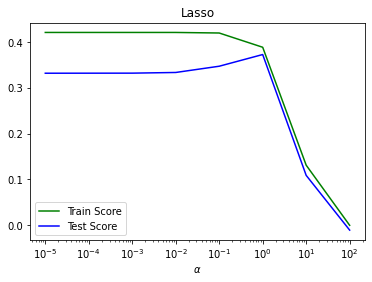

In [66]:
plt.plot(X_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(X_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.title('Lasso')

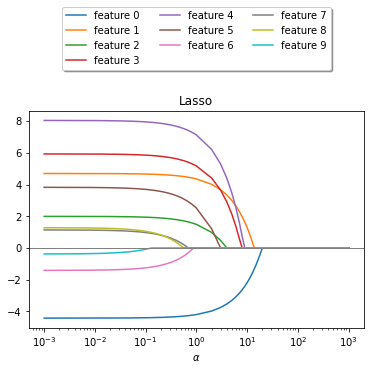

In [67]:
%matplotlib inline

X_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
X_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

X_range = np.append(X_range1, X_range2)
coeff = []

for alpha in X_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_reduced,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,10):
    plt.plot(X_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.title('Lasso')
plt.show()

**Ridge**

In [68]:
#Ridge
X_range = [0.00001, 0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in X_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_reduced,y_train)
    train_score_list.append(ridge.score(X_reduced,y_train))
    test_score_list.append(ridge.score(Xt_reduced, y_test))

In [69]:
print(train_score_list)
print(test_score_list)

[0.42082307010942765, 0.4208230700549169, 0.4208230646637503, 0.42082253141093173, 0.4207745416136037, 0.4185953821247057, 0.40095951590689227]
[0.3318475722647908, 0.3318510799630855, 0.331882945744263, 0.3321994010549799, 0.33515842689793784, 0.3526479762245406, 0.36591195398085696]


In [70]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}]

print("# Tuning hyper-parameters")
print()

model_ridge = GridSearchCV(Ridge(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_ridge.fit(X_reduced, y_train)


print('Ridge: Best Parameters',model_ridge.best_params_)


y_pred_ridge = model_ridge.predict(Xt_reduced)
print(model_ridge.score(Xt_reduced,y_test))

# Tuning hyper-parameters

Ridge: Best Parameters {'alpha': 10}
0.3526479762245406


In [71]:
#finding Cross-validation scores, Average Train score and Average Test score using Ridge 
ridge = Ridge(alpha=0.1)
ridge.fit(X_sc,y_train)
print('Cross-validation scores:',cross_val_score(ridge,X_reduced,y_train) )
print('Cross-validation scores:',cross_val_score(ridge,Xt_reduced,y_test) )
print('Average Train score:',cross_val_score(ridge,X_reduced,y_train).mean())
print('Average Test score:',cross_val_score(ridge,Xt_reduced,y_test).mean())

Cross-validation scores: [0.50451141 0.44885783 0.30631079 0.13645476 0.38044474]
Cross-validation scores: [ 0.34541971  0.27618668 -1.65200016 -0.16735858  0.50258317]
Average Train score: 0.35531590550019043
Average Test score: -0.13903383457798993


Text(0.5, 1.0, 'Ridge')

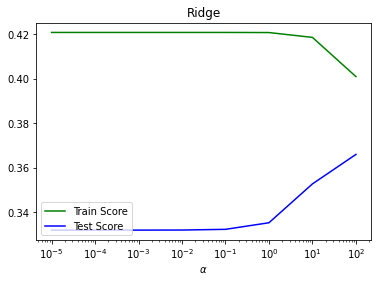

In [72]:
plt.plot(X_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(X_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.title('Ridge')

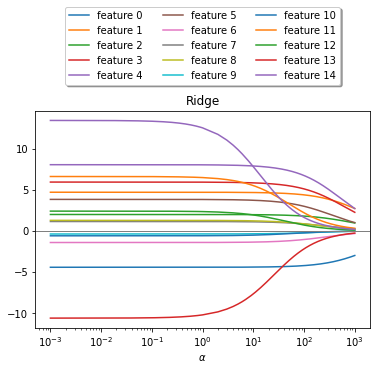

In [73]:
%matplotlib inline

X_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
X_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

X_range = np.append(X_range1, X_range2)
coeff = []

for alpha in X_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_reduced,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,15):
    plt.plot(X_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.title('Ridge')
plt.show()

**SGD Regressor**

In [74]:
#SGD Regressor
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 3000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_reduced, y_train)
print(sgd_reg.score(X_reduced, y_train))
print(sgd_reg.score(Xt_reduced, y_test))

-3.786816906886907e+22
-5.6429499812393945e+22


**KNeighborsRegressor**

Text(0, 0.5, 'MSE')

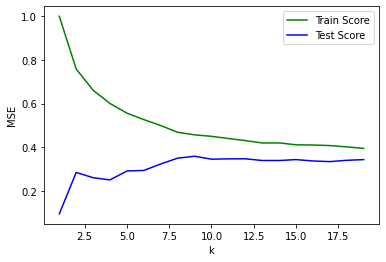

In [75]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_reduced, y_train)
    train_score_array.append(knn_reg.score(X_reduced, y_train))
    test_score_array.append(knn_reg.score(Xt_reduced, y_test))

X_axis = range(1,20)
plt.plot(X_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(X_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [76]:
print(train_score_array)
print(test_score_array)

[1.0, 0.7579596015269027, 0.6609196442405211, 0.6002401056655575, 0.5559900613864057, 0.526260742121222, 0.4992720120777566, 0.4682513518429571, 0.4565617302034475, 0.44970401668487225, 0.4397387479354361, 0.43030909229827585, 0.4193080056009947, 0.4195661288772664, 0.41093342277548395, 0.40991008920050986, 0.40747400942542966, 0.4012217625533959, 0.39445965599074273]
[0.09419293219171809, 0.28427070293820955, 0.2601045893602295, 0.25005975613359566, 0.29077986822498336, 0.29344343301493503, 0.3230628892416807, 0.3496580767296358, 0.3584827429212559, 0.3449512524679106, 0.3465146635424301, 0.3467845136565937, 0.338957035697664, 0.3388545582768975, 0.34318115318800757, 0.3367267546997328, 0.33395032960074567, 0.3398150319322718, 0.3430880999307493]


In [77]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}]

model_knn = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_knn.fit(X_reduced, y_train)


print('KNN: Best Parameters',model_knn.best_params_)


y_pred_knn = model_knn.predict(Xt_reduced)
print(model_knn.score(Xt_reduced,y_test))

KNN: Best Parameters {'n_neighbors': 9}
0.3584827429212559


In [78]:
#finding Cross-validation scores, Average Train score and Average Test score using KNeighborsRegressor 
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_reduced,y_train)
print('Cross-validation scores:',cross_val_score(knn,X_reduced,y_train) )
print('Cross-validation scores:',cross_val_score(knn,Xt_reduced,y_test) )
print('Average Train score:',cross_val_score(knn,X_reduced,y_train).mean())
print('Average Test score:',cross_val_score(knn,Xt_reduced,y_test).mean())

Cross-validation scores: [0.29342313 0.3767894  0.29210617 0.30532149 0.36457082]
Cross-validation scores: [0.3054995  0.41505447 0.1037233  0.06373466 0.34155254]
Average Train score: 0.32644220293052023
Average Test score: 0.24591289098104938


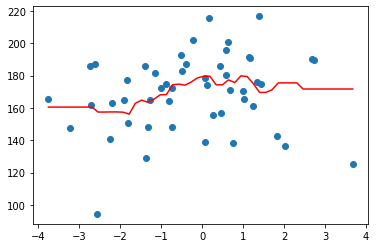

In [79]:
X_b = X_reduced[:50,1].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(12)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

**Polynomial Regression**

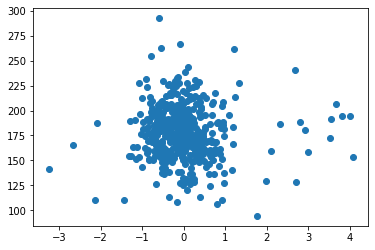

In [80]:
#Polynomial Regression
from  sklearn.preprocessing  import PolynomialFeatures
X_train_1 = X_reduced[:,6].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [81]:
train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_reduced)
    X_test_poly = poly.transform(Xt_reduced)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [82]:
print(train_score_list)
print(test_score_list)

[0.4208230701094332, 0.7254520584794543, 1.0]
[0.331847536831003, -2.3767075376165994, -477840.553206893]


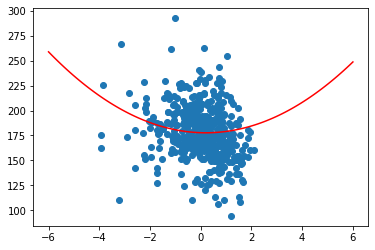

In [83]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_reduced[:,9].reshape(-1,1))
lreg.fit(X_train_poly, y_train)

X_axis = np.linspace(-6,6,100).reshape(-1,1)
X_poly = poly.transform(X_axis)
y_predict = lreg.predict(X_poly)

X_train_1 = X_sc[:,9].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(X_axis, y_predict, c = 'r',label='Truth')

In [84]:
# finding Cross-validation scores, Average Train score and Average Test score using Polynomial Regression 
poly = LinearRegression()
poly.fit(X_train_poly, y_train)
print('Cross-validation scores:',cross_val_score(poly,X_train_poly, y_train) )
print('Cross-validation scores:',cross_val_score(poly,X_test_poly, y_test) )
print('Average Train score:',cross_val_score(poly,X_train_poly, y_train).mean())
print('Average Test score:',cross_val_score(poly,X_test_poly, y_test).mean())

Cross-validation scores: [-0.06133752 -0.00841237 -0.0195769  -0.02774593 -0.02497436]
Cross-validation scores: [-2.75133627e-01 -2.66866527e+00 -4.37804238e+03 -5.80935832e+00
 -1.63873595e+00]
Average Train score: -0.028409417009371475
Average Test score: -877.6868543778925


In [85]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_reduced)
X_test_poly = poly.transform(Xt_reduced)
lreg.fit(X_train_poly, y_train)

LinearRegression()

**SVM Regressor**

In [86]:
#SVM Regressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1, 10, 100],
                     'C': [0.01, 0.1, 1, 10, 100]},
                    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]},
                    {'kernel': ['poly'], 'degree': [1,2,3,4,5],
                     'C': [0.01, 0.1, 1, 10, 100]}]

print("# Tuning hyper-parameters")
print()

model = GridSearchCV(SVR(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model.fit(X_reduced, y_train)


print('SVM: Best Parameters',model.best_params_)


y_pred_svr = model.predict(Xt_reduced)
print(model.score(Xt_reduced,y_test))

# Tuning hyper-parameters

SVM: Best Parameters {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.3777401993478213


In [87]:
# finding Cross-validation scores, Average Train score and Average Test score using SVR 
svrrbf = SVR(kernel='rbf',gamma=0.01,C=10)
svrrbf.fit(X_sc, y_train)
print('Cross-validation scores:',cross_val_score(svrrbf,X_reduced, y_train) )
print('Cross-validation scores:',cross_val_score(svrrbf,Xt_reduced, y_test) )
print('Average Train score:',cross_val_score(svrrbf,X_reduced, y_train).mean())
print('Average Test score:',cross_val_score(svrrbf,Xt_reduced, y_test).mean())

Cross-validation scores: [0.43594044 0.46635545 0.35527827 0.30966232 0.40498726]
Cross-validation scores: [0.29795844 0.47767622 0.07568034 0.09841854 0.38122199]
Average Train score: 0.3944447470529971
Average Test score: 0.26619110608627583


**Linear SVR**

[-43.27188410221259, -41.257042750413326, -23.75043415835979, -0.18007843345680064, -0.2925676678795506, -0.5363477914540813, -0.9545409465210011, -3.1634518445942437]
[-42.25375218472909, -40.31688363524693, -23.447375676614183, -1.574521996768719, -1.5753280822174265, -1.951132340175279, -3.2006760293863783, -10.262982852159498]


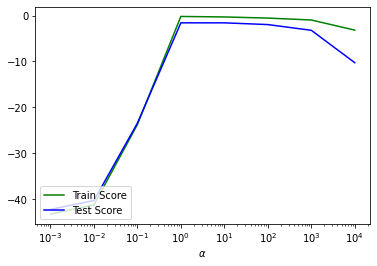

In [88]:
# Linear SVR
from sklearn.svm import LinearSVR

train_score_list = []
test_score_list = []
C= [0.001,0.01,0.1,1,10,100,1000,10000]

for i in C: 
    clf = LinearSVR(C=i)
    clf.fit(X_sc,y_train)
    train_score_list.append(clf.score(X_reduced,y_train))
    test_score_list.append(clf.score(Xt_reduced, y_test))


import matplotlib.pyplot as plt
plt.plot(C, train_score_list, c = 'g', label = 'Train Score')
plt.plot(C, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
print(train_score_list)
print(test_score_list)

In [89]:
tuned_parameters = [{'C': [0.001,0.01, 0.1, 1, 10, 100,1000]}]

print("# Tuning hyper-parameters")
print()

model_linsvr = GridSearchCV(LinearSVR(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_linsvr.fit(X_reduced, y_train)


print('SVM: Best Parameters',model_linsvr.best_params_)


y_pred_linsvr = model_linsvr.predict(Xt_reduced)
print(model_linsvr.score(Xt_reduced,y_test))

# Tuning hyper-parameters

SVM: Best Parameters {'C': 10}
0.276549608430135


In [90]:
# finding Cross-validation scores, Average Train score and Average Test score using LinearSVR 
svr = LinearSVR(C=0.1)
svr.fit(X_sc, y_train)
print('Cross-validation scores:',cross_val_score(svr,X_reduced, y_train) )
print('Cross-validation scores:',cross_val_score(svr,Xt_reduced, y_test) )
print('Average Train score:',cross_val_score(svr,X_reduced, y_train).mean())
print('Average Test score:',cross_val_score(svr,Xt_reduced, y_test).mean())

Cross-validation scores: [-29.55687439 -29.08905395 -31.70162097 -29.98258301 -21.33073076]
Cross-validation scores: [-51.8322503  -44.18702249 -33.71149272 -30.9518328  -40.20478903]
Average Train score: -28.332172616895427
Average Test score: -40.17747746707134


**Decision Tree Regressor**

In [91]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
tuned_parameters = [{'max_depth':[1,2,3,4,5,6,7,8,9,10]}]

print("# Tuning hyper-parameters")
print()

model_tree = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model_tree.fit(X_reduced, y_train)


print('SVM: Best Parameters',model_tree.best_params_)


y_pred_svr = model_tree.predict(Xt_reduced)
print(model_tree.score(Xt_reduced,y_test))

# Tuning hyper-parameters

SVM: Best Parameters {'max_depth': 2}
0.0035932793911350736


In [92]:
# finding Cross-validation scores, Average Train score and Average Test score using Decision Tree Regressor 
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_reduced, y_train)
print('Cross-validation scores:',cross_val_score(tree,X_reduced, y_train) )
print('Cross-validation scores:',cross_val_score(tree,Xt_reduced, y_test) )
print('Average Train score:',cross_val_score(tree,X_reduced, y_train).mean())
print('Average Test score:',cross_val_score(tree,Xt_reduced, y_test).mean())

Cross-validation scores: [ 0.0072711  -0.0281503   0.12399316 -0.26242443  0.16945133]
Cross-validation scores: [ 0.16678289  0.25016146  0.07563095 -0.06434635  0.18151668]
Average Train score: -0.0013770684548181978
Average Test score: 0.1358023897902403


**Summary Table**

In [93]:
#Summary Table prePCA
Summary={'Algorithm':['Linear Regression', 'KNN Regressor','SVM', 'Linear SVM', 'Decision Tree Regressor','Ridge','Lasso','Polynomial'], 'Best Accuracy Obtained':[0.76,0.33,0.60,0.72,0.17,0.76,0.76,0.26], 'Parameters':['n/a','K=12',['kernel:rbf','gamma=0.01','C=10'],'C=0.1','max_depth=4','alpha=0.1','alpha=0.0001','polynomial=2']}
Summary_table_PrePCA=pd.DataFrame(Summary, columns=['Algorithm','Best Accuracy Obtained','Parameters'])

In [94]:
#Summary Table PostPCA
Summary={'Algorithm':['Linear Regression', 'KNN Regressor','SVM', 'Linear SVM', 'Decision Tree Regressor','Ridge','Lasso','Polynomial'], 'Best Accuracy Obtained':[0.76,0.46,0.60,0.77,0.25,0.76,0.76,-0.42], 'Parameters':['n/a','K=12',['kernel:rbf','gamma=0.01','C=10'],'C=0.1','max_depth=6','alpha=0.1','alpha=0.0001','polynomial=2']}
Summary_table_PostPCA=pd.DataFrame(Summary, columns=['Algorithm','Best Accuracy Obtained','Parameters'])

In [95]:
Summary_table_PrePCA

,Algorithm,Best Accuracy Obtained,Parameters
0,Linear Regression,0.76,n/a
1,KNN Regressor,0.33,K=12
2,SVM,0.60,"[kernel:rbf, gamma=0.01, C=10]"
3,Linear SVM,0.72,C=0.1
4,Decision Tree Regressor,0.17,max_depth=4
5,Ridge,0.76,alpha=0.1
6,Lasso,0.76,alpha=0.0001
7,Polynomial,0.26,polynomial=2


In [96]:
Summary_table_PostPCA

,Algorithm,Best Accuracy Obtained,Parameters
0,Linear Regression,0.76,n/a
1,KNN Regressor,0.46,K=12
2,SVM,0.60,"[kernel:rbf, gamma=0.01, C=10]"
3,Linear SVM,0.77,C=0.1
4,Decision Tree Regressor,0.25,max_depth=6
5,Ridge,0.76,alpha=0.1
6,Lasso,0.76,alpha=0.0001
7,Polynomial,-0.42,polynomial=2


**Thus, Linear regression, Linear SVM and regularized linear regression (Ridge and Lasso) give the best results. Thus, in some cases PCA improved the accuracy but not in other cases**

**Linear Regression**

In [97]:
#We will predict using Linear Regression
svr=LinearSVR()
svr.fit(X_reduced,y_train)
pred=svr.predict(Xt_reduced)

In [98]:
pred=np.exp(pred)
ytest=np.exp(y_test)

In [99]:
prediction_comparison=pd.DataFrame({'Actual':ytest,'Predicted':pred})

In [100]:
prediction_comparison.head()

,Actual,Predicted
1208,7.096391e+93,1.193228e+84
43,3.478708e+98,2.150559e+88
420,2.063108e+68,4.494355e+62
2299,8.894537e+83,2.285083e+76
668,2.526409e+67,1.182822e+72


In [101]:
prediction_comparison['error']=ytest-pred

In [102]:
mean_squared_error=(prediction_comparison['error']**2).mean()

In [103]:
mean_squared_error

1.518400890284597e+253

In [104]:
# import math 
import math
root_mean_squared_error=math.sqrt(mean_squared_error)
root_mean_squared_error

3.8966663833135585e+126

**get more accuracy, we trained all supervised regression algorithms but you can try out a few of them which are always popular. After training all algorithms, I found that  Linear regression, Linear SVM and regularized linear regression (Ridge and Lasso)  regression are given high accuracy than remain but I have chosen Linear SVM.**